# Hey Everyone! Here's my progress in learning Tensorflow and practicing Machine Learning. **Part 3**


**Follow my journey on social media:** [Podcast](https://open.spotify.com/show/6FxUBKO4bqwRWsjAIGZMwz) | [Twitter](https://twitter.com/tlkdata2me) | [Instagram](https://www.instagram.com/tlkdata2me/) | [LinkedIn](https://www.linkedin.com/in/shecananalyze/) 

Learning Source: [Click here to take freeCodeCamp's TensorFlow 2.0 Complete Course](https://www.youtube.com/watch?v=tPYj3fFJGjk)

#Deep Computer Vision 
*(Copied from lesson notes)*

In this guide we will learn how to peform *image classification and object detection/recognition* using deep computer vision with something called a **convolutional neural network**.

The goal of our convolutional neural networks will be to classify and detect images or specific objects from within the image. We will be using image data as our features and a label for those images as our label or output.

We already know how neural networks work so we can skip through the basics and move right into explaining the following concepts.
- Image Data
- Convolutional Layer
- Pooling Layer
- CNN Architectures

The major differences we are about to see in these types of neural networks are the layers that make them up.

## Image Data

Image data is usually made up of 3 dimensions. 

These 3 dimensions are as follows:
1. image height
2. image width
3. color channels

**Color Channels**

The number of color channels represents the depth of an image and coorelates to the colors used in it. For example, an image with three channels is likely made up of rgb (red, green, blue) pixels. So, for each pixel we have three numeric values in the range 0-255 that define its color. For an image of color depth 1 we would likely have a greyscale image with one value defining each pixel, again in the range of 0-255.

![alt text](https://blog.xrds.acm.org/wp-content/uploads/2016/06/Figure1.png)

## Convolutional Neural Network
**Dense Layer:** *A dense layer will consider the ENTIRE image in the exact pattern.* 

**Convolutional (Neural Network) Layer:** *The convolutional layer will consider specific parts of the image anywhere in the photo.* 

Each convolutional neural network is made up of one or many convolutional layers. These layers are different than the *dense* layers we have seen previously. Their goal is to find patterns from within images that can be used to classify the image or parts of it. But this may sound familiar to what our densly connected neural network in the previous section was doing, well that's becasue it is. 

The fundemental difference between a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layers detect patterns locally. When we have a densly connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at all the information and is only capable of analyzing the data in a global capacity. Our convolutional layer however will not be densly connected, this means it can detect local patterns using part of the input data to that layer.



### How They Work
A dense neural network learns patterns that are present in one specific area of an image. This means if a pattern that the network knows is present in a different area of the image it will have to learn the pattern again in that new area to be able to detect it. 

*Let's use an example to better illustrate this.*

We'll consider that we have a dense neural network that has learned what an eye looks like from a sample of dog images.

![alt text](https://drive.google.com/uc?export=view&id=16FJKkVS_lZToQOCOOy6ohUpspWgtoQ-c)

Let's say it's determined that an image is likely to be a dog if an eye is present in the boxed off locations of the image above.

Now let's flip the image.
![alt text](https://drive.google.com/uc?export=view&id=1V7Dh7BiaOvMq5Pm_jzpQfJTZcpPNmN0W)

Since our **densly connected network** has only recognized patterns globally it will look where it thinks the eyes should be present. Clearly it does not find them there and therefore would likely determine this image is not a dog. Even though the pattern of the eyes is present, it's just in a different location.

Since **convolutional layers** learn and detect patterns from different areas of the image, they don't have problems with the example we just illustrated. They know what an eye looks like and by analyzing different parts of the image can find where it is present. 

### Multiple Convolutional Layers
(Will need to revisit)
In our models it is quite common to have more than one convolutional layer. Even the basic example we will use in this guide will be made up of 3 convolutional layers. These layers work together by increasing complexity and abstraction at each subsequent layer. The first layer might be responsible for picking up edges and short lines, while the second layer will take as input these lines and start forming shapes or polygons. Finally, the last layer might take these shapes and determine which combiantions make up a specific image.

## Feature Maps
**Feature map:** A 3D tensor with two spacial axes (width and height) and one depth axis. Our convolutional layers take feature maps as their input and return a **new** feature map that represents the prescence of specific filters from the **previous** feature map. These are what we call *response maps*.

Convolutional Layers (Summary of explaination)

The properties of a convolutional layer are:
- Input size
- Filters
  - Filters are a pattern of pixels
   - We look for filters in each convolutional layer
- Sample size of filters

The process goes as follows:
- The sample size filter is compared to the actual image and calculated (matrix wise) 
  - Each sample size within the layer is shifted (stride) and then calculated all over again to create an output feature map
- Once all of the filters are calculated in the input layer, we then start the process all over again for the next layer. 
  - Instead of using pixels we are using the calculated numbers (output feature map) to find combinations of features that exist in the image. 
    -This helps us to find lines, curves, combinations of lines and curves, etc.

**Padding:** Adding the appropriate number of rows and/or columns to your input data such that each pixel can be centered by the filter.
  - Adds a border to help look at the edges of a photo. 

**Stride:** How many rows/cols we will move the filter each time. 

**Pooling:** Taking specific values from a sample of an output feature map to reduce the size of the feature map. 

Pooling Values:
- Min
- Max
- Average
 


### Tutorial with Imaga Dataset
The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the CIFAR Image Dataset. It contains 60,000 32x32 color images with 6000 images of each class.

In [9]:
import tensorflow as tf

from keras import datasets, layers, models
import matplotlib.pyplot as plt

In [10]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

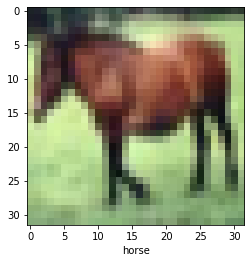

In [11]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

Build the **Convolutional Base** 

Here we will extract the features from the layer

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Layer 1**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the **activation function** relu to the output of each convolution operation.

Note: Syntax is (32 **number of filters**, (3, 3 **grid size**(3x3)))

**Layer 2**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [13]:
model.summary()  # let's have a look at our model so far

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

### Adding Dense Layers

Take the convolutional base (extracted features) and add a way to classify them. 

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

We can see that the flatten layer changes the shape of our data so that we can feed it to the 64-node dense layer, followed by the final output layer of 10 neurons (one for each class).

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

### Training the model



In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
   4/1563 [..............................] - ETA: 29s - loss: 2.2995 - accuracy: 0.1406 

2022-03-11 08:00:38.257560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1562/1563 [============================>.] - ETA: 0s - loss: 1.5003 - accuracy: 0.4520

2022-03-11 08:00:54.252701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 18s 11ms/step - loss: 1.5002 - accuracy: 0.4520 - val_loss: 1.2855 - val_accuracy: 0.5357
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1282 - accuracy: 0.5999 - val_loss: 1.0997 - val_accuracy: 0.6082
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9804 - accuracy: 0.6552 - val_loss: 0.9808 - val_accuracy: 0.6601
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8884 - accuracy: 0.6872 - val_loss: 0.9312 - val_accuracy: 0.6771
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8207 - accuracy: 0.7115 - val_loss: 0.9082 - val_accuracy: 0.6900
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7639 - accuracy: 0.7332 - val_loss: 0.8727 - val_accuracy: 0.6999
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7166 - accuracy: 0.7484 - val_loss: 0.8373 - val_accura

## Evaluating the Model
We can determine how well the model performed by looking at it's performance on the test data set. And run predictions as we did before. 

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.8927 - accuracy: 0.7040 - 1s/epoch - 4ms/step
0.7040000557899475


In [18]:
predictions = model.predict(test_images)
print(predictions[3])

2022-03-11 08:03:31.188121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[ 6.189109    0.678224    0.07928343 -0.33980727 -2.2473614  -2.8637583
 -1.751885   -7.483991    5.5922394   2.0172317 ]


In [19]:
import numpy as np

def pred(n):
  print(class_names[np.argmax(predictions[n])])
  print(test_labels[n])

pred(9)  

automobile
[1]


The model has guessed: automobile


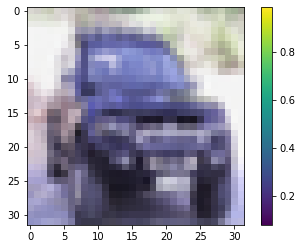

In [20]:
#The model should return what it's prediction of the pixelated image is. 
#The matplotlib portion of the code block will return a graph of the image in question

def predpic(n):
  print('The model has guessed: {}'.format(class_names[np.argmax(predictions[n])])) #Enter prediction index
  plt.figure()
  plt.imshow(test_images[n]) #enter image index
  plt.colorbar()
  plt.grid(False)
  plt.show()

predpic(9)

### Working with Small Datasets

A few techniques if we're working with small data sets and need to expand the data

### Data Augmentation
**Data Augmentation:** Performing random transformations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes. This will allow us to avoid overfitting and create a larger dataset from a smaller one we can use a technique called 
- In other words, we can take one image and pass different versions (flipped, stretched, rotated etc) of it through the model and augment it multiple times. 


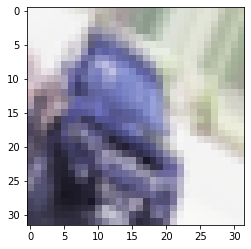

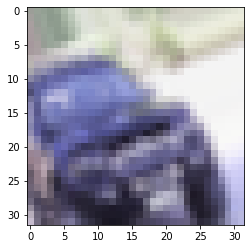

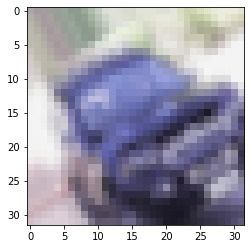

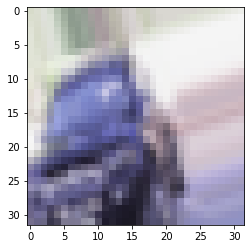

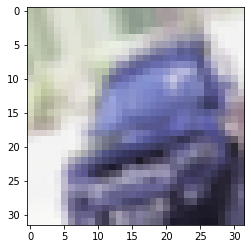

In [21]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = test_images[9]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()


### Pretrained Models

Here we will use part of an existing model and then "fine tune" it for the use of our own data. 

### Fine Tuning
Tweaking the final layers in our convolutional base to work better for our specific problem. This involves not touching or retraining the earlier layers in our convolutional base but only adjusting the final few layers.

## Using a Pretrained Model
In this section we will combine the tecniques we learned above and use a pretrained model and fine tuning to classify images of dogs and cats using a small dataset.

In [22]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

### Dataset Example
We will load the *cats_vs_dogs* dataset from the modoule tensorflow_datatsets.

This dataset contains (image, label) pairs where images have different dimensions and 3 color channels.

In [23]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

2022-03-11 08:03:32.549644: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dataset cats_vs_dogs downloaded and prepared to /Users/melmello/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


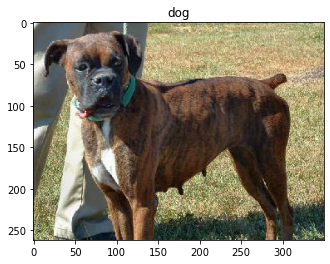

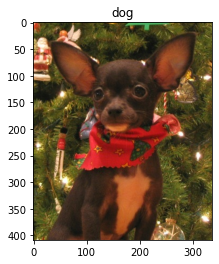

In [24]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels

# display 2 images from the dataset
for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

### Data Preprocessing
Since the sizes of our images are all different, we need to convert them all to the same size. We can create a function that will compress the size of the image for us below.

In [25]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32) #cast meanst to convert (to a float in this case)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

Now we can apply this function to all our images using ```.map()```.

In [26]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

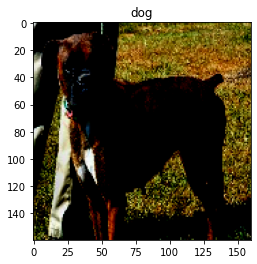

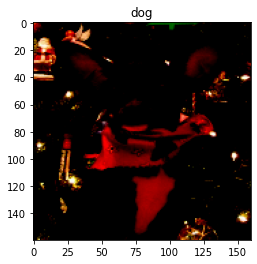

In [27]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [28]:
#No clue what this means at this moment
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [29]:
#Looking at the shape of the new image
for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


## Picking a Pretrained Model
The model we are going to use as the convolutional base for our model is the **MobileNet V2** developed at Google. This model is trained on 1.4 million images and has 1000 different classes.

We want to use this model but only its convolutional base. So, when we load in the model, we'll specify that we don't want to load the top (classification) layer. We'll tell the model what input shape to expect and to use the predetermined weights from *imagenet* (Googles dataset).


In [30]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 1s 0us/step


In [31]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

At this point this base_model will simply output a shape (32, 5, 5, 1280) tensor (from the last row in the summary) that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of differnt filters/features.

In [32]:
for image, _ in train_batches.take(1): # He went a little fast will look further into this with practice. 
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


### Freezing the Base
The term **freezing** refers to disabling the training property of a layer. It simply means we won’t make any changes to the weights of any layers that are frozen during training. This is important as we don't want to change the convolutional base that already has learned weights.

In [33]:
base_model.trainable = False

In [34]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

### Adding our Classifier
Now that we have our base layer setup, we can add the classifier. Instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.  

In [35]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

Finally, we will add the predicition layer that will be a single dense neuron. We can do this because we only have two classes to predict for.

In [36]:
prediction_layer = keras.layers.Dense(1)

Now we will combine these layers together in a model.


In [37]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


We have only **1,281 Trainable Parameters** because we only have 1280 connections from the *global_average_pooling2d layer* to the *dense_2 layer* and 1 Bias

### Training the Model

In [39]:
base_learning_rate = 0.0001 #How much are we allowed to modify the network, it's low to ensure we don't make any major changes.
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [40]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

2022-03-11 08:05:03.253394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 7/20 [=========>....................] - ETA: 0s - loss: 0.7735 - accuracy: 0.5000

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 2s 37ms/step - loss: 0.7491 - accuracy: 0.4984


Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


In [41]:
# Now we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/3


2022-03-11 08:05:05.741362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


168/582 [=======>......................] - ETA: 17s - loss: 0.4180 - accuracy: 0.7842

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


202/582 [=========>....................] - ETA: 15s - loss: 0.3844 - accuracy: 0.8074

212/582 [=========>....................] - ETA: 15s - loss: 0.3758 - accuracy: 0.8128

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


284/582 [=============>................] - ETA: 12s - loss: 0.3243 - accuracy: 0.8452

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


493/582 [========================>.....] - ETA: 3s - loss: 0.2380 - accuracy: 0.8934

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


505/582 [=========================>....] - ETA: 3s - loss: 0.2348 - accuracy: 0.8952

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


515/582 [=========================>....] - ETA: 2s - loss: 0.2325 - accuracy: 0.8962

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


543/582 [==========================>...] - ETA: 1s - loss: 0.2255 - accuracy: 0.8997

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


549/582 [===========================>..] - ETA: 1s - loss: 0.2241 - accuracy: 0.9006

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.2165 - accuracy: 0.9046

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 29s 46ms/step - loss: 0.2165 - accuracy: 0.9046 - val_loss: 0.0917 - val_accuracy: 0.9643
Epoch 2/3
169/582 [=======>......................] - ETA: 18s - loss: 0.0832 - accuracy: 0.9724

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


201/582 [=========>....................] - ETA: 16s - loss: 0.0820 - accuracy: 0.9719

211/582 [=========>....................] - ETA: 16s - loss: 0.0819 - accuracy: 0.9714

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


283/582 [=============>................] - ETA: 13s - loss: 0.0811 - accuracy: 0.9706

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


491/582 [========================>.....] - ETA: 3s - loss: 0.0767 - accuracy: 0.9722

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


505/582 [=========================>....] - ETA: 3s - loss: 0.0767 - accuracy: 0.9721

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


515/582 [=========================>....] - ETA: 2s - loss: 0.0763 - accuracy: 0.9723

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


543/582 [==========================>...] - ETA: 1s - loss: 0.0757 - accuracy: 0.9725

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


549/582 [===========================>..] - ETA: 1s - loss: 0.0755 - accuracy: 0.9726

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9730

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 28s 48ms/step - loss: 0.0751 - accuracy: 0.9730 - val_loss: 0.0677 - val_accuracy: 0.9725
Epoch 3/3
169/582 [=======>......................] - ETA: 17s - loss: 0.0624 - accuracy: 0.9782

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


201/582 [=========>....................] - ETA: 16s - loss: 0.0616 - accuracy: 0.9779

211/582 [=========>....................] - ETA: 15s - loss: 0.0611 - accuracy: 0.9778

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


284/582 [=============>................] - ETA: 12s - loss: 0.0620 - accuracy: 0.9772

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


492/582 [========================>.....] - ETA: 3s - loss: 0.0613 - accuracy: 0.9773

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


504/582 [========================>.....] - ETA: 3s - loss: 0.0610 - accuracy: 0.9775

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


514/582 [=========================>....] - ETA: 2s - loss: 0.0608 - accuracy: 0.9775

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


542/582 [==========================>...] - ETA: 1s - loss: 0.0605 - accuracy: 0.9778

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


548/582 [===========================>..] - ETA: 1s - loss: 0.0603 - accuracy: 0.9779

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.0604 - accuracy: 0.9779

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 28s 48ms/step - loss: 0.0604 - accuracy: 0.9779 - val_loss: 0.0592 - val_accuracy: 0.9759
[0.9046211838722229, 0.972971498966217, 0.9779151082038879]


In [42]:
model.save("dogs_vs_cats.h5")  # we can save the model and reload it at anytime in the future
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')
#from here we can predict like we did for the previous modules